
# Линейная регрессия. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии на реальных данных.

## Что входит в практическую работу


1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью  библиотеки scikit-learn.
5. Получить качество модели с помощью MSE, MAE.


## Что оценивается 

* Выполнены все этапы работы.
* Сделан вывод по результатам.
* Модель не переобучена.
* Получена модель хорошего качества.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задачи. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.



## Что нужно сделать

Пусть у нас имеется некоторый набор данных `sales.csv` о продажах квартир:

- **SalePrice** (цена продажи, *зависимая переменная*).
- **GrLivArea** (наземная жилая зона).
- **OverallQuality** (общее качество).
- **GarageArea** (территория гаража).
- **SaleCondition** (условия сделки).

Реализуйте построение модели линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE. Определите, что вы не переобучились.

### 1. Импорт библиотек

In [1]:
import numpy as np

# обработка данных
import pandas as pd

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt

# стандартизация данных
from sklearn.preprocessing import MinMaxScaler

# обучение модели
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# метрики
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 2. Загрузка данных

In [2]:
# Ваш код здесь
sales_df = pd.read_csv('sales.csv')
sales_df

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal
...,...,...,...,...,...,...
1455,175000,1647,460,6,Pave,Normal
1456,210000,2073,500,6,Pave,Normal
1457,266500,2340,252,7,Pave,Normal
1458,142125,1078,240,5,Pave,Normal


### 3. Первичный анализ

1. Проведите анализ данных, посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной. Нередко, если признаков в выборке не так много, удобно построить [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).
2. Закодируйте категориальные признаки (например, с помощью [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)).
3. Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.
4. Сделайте предварительные выводы.

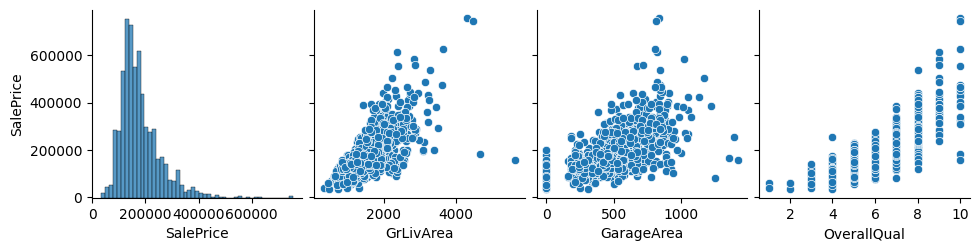

In [3]:
# Ваш код здесь
sns.pairplot(sales_df, y_vars="SalePrice")
plt.show()

with visualization parameter: 'Street'


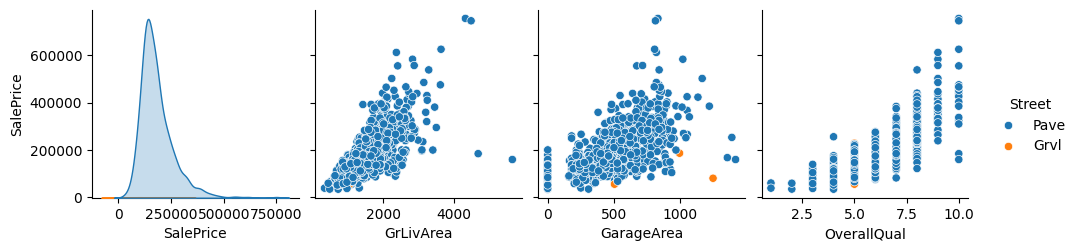

In [4]:
sns.pairplot(sales_df, hue="Street",  y_vars="SalePrice")
print("with visualization parameter: 'Street'")
plt.show()

with visualization parameter: 'SaleCondition'


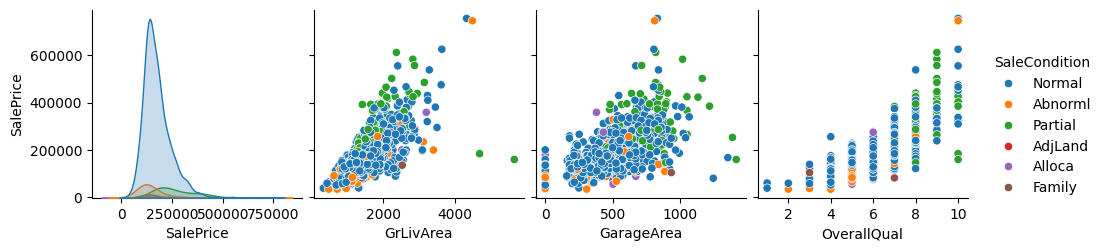

In [5]:
sns.pairplot(sales_df, hue="SaleCondition",  y_vars="SalePrice")
print("with visualization parameter: 'SaleCondition'")
plt.show()

In [6]:
sales_df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

В категариальном признаке SaleCondition есть категории которые представлены в очень маленькой доле, обобщу их в одну назвав 'other'

SaleCondition
Normal     1198
Partial     125
Abnorml     101
other        36
Name: count, dtype: int64
with visualization parameter: 'SaleCondition'


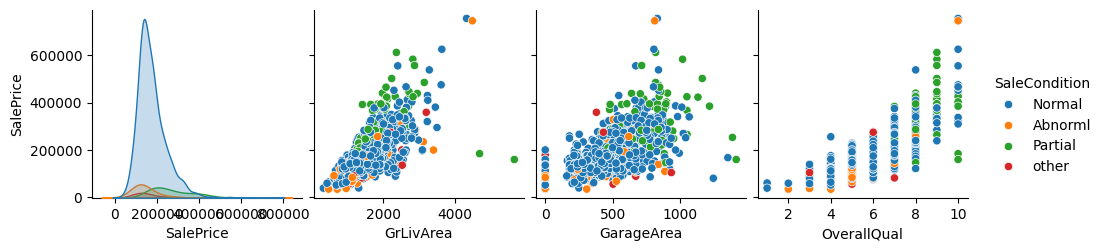

In [7]:
sales_df.loc[sales_df['SaleCondition'].isin(['AdjLand', 'Alloca', 'Family']), ['SaleCondition']] = 'other'
print(sales_df['SaleCondition'].value_counts())
sns.pairplot(sales_df, hue="SaleCondition",  y_vars="SalePrice")
print("with visualization parameter: 'SaleCondition'")
plt.show()


In [8]:
sales_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Удаляем выбросы

0.015068493150684932% записей в колонке SalePrice удаляем
0.0076495132127955496% записей в колонке GrLivArea удаляем
0.002803083391730904% записей в колонке GarageArea удаляем
0.007027406886858749% записей в колонке OverallQual удаляем
with visualization parameter: 'SaleCondition'


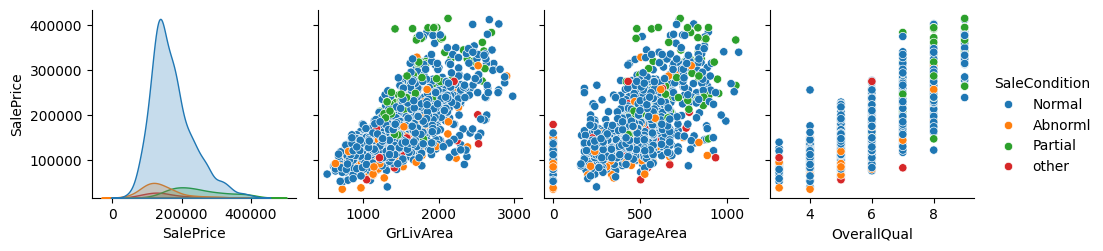

In [9]:
def otliers_cleaning(df, col):
    def calculate_outliers2(data):
        q25 = data.quantile(0.25)
        q75 = data.quantile(0.75)
        iqr = q75 - q25
        
        boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
        return boundaries

    def calculate_outliers(datacol):
        # datacol - колонка с числами из датафрейма (в виде датафрейма)
        # datacol.mean() - среднее арифмитическое
        # datacol.std() - среднеквадратическое отклонение
    	minimum = datacol.mean() - 3 * datacol.std()  
    	maximum = datacol.mean() + 3 * datacol.std()
    	boundaries = (minimum, maximum)
    	return boundaries
        
    boundaries = calculate_outliers(df[col])
    #Подсчитать количество значений, которые больше верхней границы или меньше нижней границы
    is_outlier = (df[col] < boundaries[0]) | (df[col] > boundaries[1])
    is_outlier.sum()
    print(f"{is_outlier.sum() / len(df)}% записей в колонке {col} удаляем") # процент выбросов относительно общего количества записей в датасете

    df = df[(df[col] < boundaries[1]) & (df[col] > boundaries[0])]
    # df.loc[df[col] > boundaries[1], col] = int(boundaries[1])  
    # df.loc[df[col] < boundaries[0], col] = int(boundaries[0])
    return df

columns_list = ['SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual']

for colname in columns_list:
    sales_df = otliers_cleaning(sales_df, colname)

sns.pairplot(sales_df, hue="SaleCondition",  y_vars="SalePrice")
print("with visualization parameter: 'SaleCondition'")
plt.show()

Text(0, 0.5, 'SalePrice')

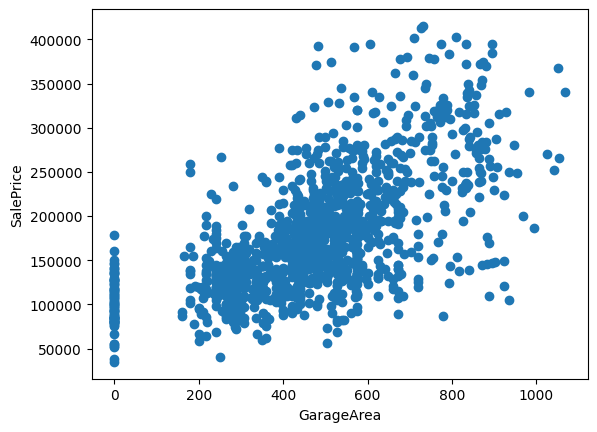

In [10]:
plt.scatter(sales_df.GarageArea, sales_df.SalePrice)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

In [11]:
# Новые фитчи


# # sales_df['power3_GrLivArea'] = sales_df['GrLivArea'].apply(lambda x: np.power(x, 1/2))



sales_df['GrLivArea_plus_GarageArea'] = sales_df['GrLivArea']+sales_df['GarageArea']
# # sales_df['cos_GrLivArea_plus_GarageArea'] = sales_df['GrLivArea_plus_GarageArea'].apply(lambda x: np.cos(x))
# # sales_df['sin_GrLivArea_plus_GarageArea'] = sales_df['GrLivArea_plus_GarageArea'].apply(lambda x: np.sin(x))

sales_df['division_GrLivAreaplus_OverallQual'] = sales_df['GrLivArea_plus_GarageArea']/sales_df['OverallQual']
# # # # sale_ohe_df['sin_division_GrLivAreaplus_OverallQual'] = sale_ohe_df['division_GrLivAreaplus_OverallQual'].apply(lambda x: np.cos(x))
# # # # sale_ohe_df['tan_division_GrLivAreaplus_OverallQual'] = sale_ohe_df['division_GrLivAreaplus_OverallQual'].apply(lambda x: np.tan(x))
plus_fitches = [
                  # 'division_GrLivAreaplus_OverallQual'
#                 # ,'devis_Area_OverallQual'
#                 # , 'cos_GrLivArea'
#                 # , 'sin_GrLivArea'
#                 # , 'tan_GrLivArea'               
#                 # , 'log_GarageArea'
#                 # , 'cos_OverallQual'
#                 # , 'sin_OverallQual']
                    'GrLivArea_plus_GarageArea'
#                 # , 'cos_GrLivArea_plus_GarageArea'
#                 # , 'sin_GrLivArea_plus_GarageArea'
               ]

with visualization parameter: 'SaleCondition'


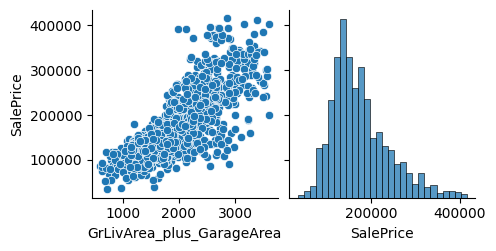

In [12]:
sns.pairplot(sales_df[plus_fitches+['SalePrice']], y_vars="SalePrice")
print("with visualization parameter: 'SaleCondition'")
plt.show()
# Результат тестов не понравился, продолжу без этих фитч

Генерация фитч с помошью PolynomialFeatures

In [13]:
from sklearn.preprocessing import PolynomialFeatures

columns_to_polym = ['GrLivArea', 'GarageArea', 'OverallQual'] + plus_fitches
# 1. Разделите датафрейм на фичи и целевую переменную
X = sales_df[columns_to_polym]  # фичи

# 2. Примените PolynomialFeatures к фичам
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X)

# 3. Создайте новый датафрейм с полиномиальными фичами
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))
X_poly_df.drop(columns=['1']+columns_to_polym, inplace=True)
# 4. Добавьте обратно целевую переменную
sales_df = pd.concat([X_poly_df.reset_index(drop=True), sales_df.reset_index(drop=True)], axis=1)
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Columns: 213 entries, GrLivArea^2 to division_GrLivAreaplus_OverallQual
dtypes: float64(206), int64(5), object(2)
memory usage: 2.3+ MB


In [14]:
print("Созданных фитч", len(poly.get_feature_names_out(X.columns)[1:]))
poly.get_feature_names_out(X.columns)

Созданных фитч 209


array(['1', 'GrLivArea', 'GarageArea', 'OverallQual',
       'GrLivArea_plus_GarageArea', 'GrLivArea^2', 'GrLivArea GarageArea',
       'GrLivArea OverallQual', 'GrLivArea GrLivArea_plus_GarageArea',
       'GarageArea^2', 'GarageArea OverallQual',
       'GarageArea GrLivArea_plus_GarageArea', 'OverallQual^2',
       'OverallQual GrLivArea_plus_GarageArea',
       'GrLivArea_plus_GarageArea^2', 'GrLivArea^3',
       'GrLivArea^2 GarageArea', 'GrLivArea^2 OverallQual',
       'GrLivArea^2 GrLivArea_plus_GarageArea', 'GrLivArea GarageArea^2',
       'GrLivArea GarageArea OverallQual',
       'GrLivArea GarageArea GrLivArea_plus_GarageArea',
       'GrLivArea OverallQual^2',
       'GrLivArea OverallQual GrLivArea_plus_GarageArea',
       'GrLivArea GrLivArea_plus_GarageArea^2', 'GarageArea^3',
       'GarageArea^2 OverallQual',
       'GarageArea^2 GrLivArea_plus_GarageArea',
       'GarageArea OverallQual^2',
       'GarageArea OverallQual GrLivArea_plus_GarageArea',
       'GarageArea

Задача: Закодируйте категориальные признаки (например, с помощью pd.get_dummies)

In [15]:
new_cat_df = pd.get_dummies(sales_df[['SaleCondition', 'Street']], dtype=int, drop_first=True)
new_cat_df

,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_other,Street_Pave
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,0,0,0,1
4,1,0,0,1
...,...,...,...,...
1408,1,0,0,1
1409,1,0,0,1
1410,1,0,0,1
1411,1,0,0,1


In [16]:
sale_ohe_df = pd.concat([sales_df.drop(columns=['SaleCondition', 'Street']), new_cat_df], axis = 1)
sale_ohe_df

,GrLivArea^2,GrLivArea GarageArea,GrLivArea OverallQual,GrLivArea GrLivArea_plus_GarageArea,GarageArea^2,GarageArea OverallQual,GarageArea GrLivArea_plus_GarageArea,OverallQual^2,OverallQual GrLivArea_plus_GarageArea,GrLivArea_plus_GarageArea^2,...,SalePrice,GrLivArea,GarageArea,OverallQual,GrLivArea_plus_GarageArea,division_GrLivAreaplus_OverallQual,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_other,Street_Pave
0,2924100.0,937080.0,11970.0,3861180.0,300304.0,3836.0,1237384.0,49.0,15806.0,5098564.0,...,208500,1710,548,7,2258,322.571429,1,0,0,1
1,1592644.0,580520.0,7572.0,2173164.0,211600.0,2760.0,792120.0,36.0,10332.0,2965284.0,...,181500,1262,460,6,1722,287.000000,1,0,0,1
2,3189796.0,1085888.0,12502.0,4275684.0,369664.0,4256.0,1455552.0,49.0,16758.0,5731236.0,...,223500,1786,608,7,2394,342.000000,1,0,0,1
3,2948089.0,1102314.0,12019.0,4050403.0,412164.0,4494.0,1514478.0,49.0,16513.0,5564881.0,...,140000,1717,642,7,2359,337.000000,0,0,0,1
4,4831204.0,1837528.0,17584.0,6668732.0,698896.0,6688.0,2536424.0,64.0,24272.0,9205156.0,...,250000,2198,836,8,3034,379.250000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,2712609.0,757620.0,9882.0,3470229.0,211600.0,2760.0,969220.0,36.0,12642.0,4439449.0,...,175000,1647,460,6,2107,351.166667,1,0,0,1
1409,4297329.0,1036500.0,12438.0,5333829.0,250000.0,3000.0,1286500.0,36.0,15438.0,6620329.0,...,210000,2073,500,6,2573,428.833333,1,0,0,1
1410,5475600.0,589680.0,16380.0,6065280.0,63504.0,1764.0,653184.0,49.0,18144.0,6718464.0,...,266500,2340,252,7,2592,370.285714,1,0,0,1
1411,1162084.0,258720.0,5390.0,1420804.0,57600.0,1200.0,316320.0,25.0,6590.0,1737124.0,...,142125,1078,240,5,1318,263.600000,1,0,0,1


Подумайте, можно ли здесь создать дополнительные переменные из имеющихся.

In [17]:
sales_df

,GrLivArea^2,GrLivArea GarageArea,GrLivArea OverallQual,GrLivArea GrLivArea_plus_GarageArea,GarageArea^2,GarageArea OverallQual,GarageArea GrLivArea_plus_GarageArea,OverallQual^2,OverallQual GrLivArea_plus_GarageArea,GrLivArea_plus_GarageArea^2,...,OverallQual GrLivArea_plus_GarageArea^5,GrLivArea_plus_GarageArea^6,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition,GrLivArea_plus_GarageArea,division_GrLivAreaplus_OverallQual
0,2924100.0,937080.0,11970.0,3861180.0,300304.0,3836.0,1237384.0,49.0,15806.0,5098564.0,...,4.108826e+17,1.325390e+20,208500,1710,548,7,Pave,Normal,2258,322.571429
1,1592644.0,580520.0,7572.0,2173164.0,211600.0,2760.0,792120.0,36.0,10332.0,2965284.0,...,9.084834e+16,2.607347e+19,181500,1262,460,6,Pave,Normal,1722,287.000000
2,3189796.0,1085888.0,12502.0,4275684.0,369664.0,4256.0,1455552.0,49.0,16758.0,5731236.0,...,5.504511e+17,1.882543e+20,223500,1786,608,7,Pave,Normal,2394,342.000000
3,2948089.0,1102314.0,12019.0,4050403.0,412164.0,4494.0,1514478.0,49.0,16513.0,5564881.0,...,5.113729e+17,1.723327e+20,140000,1717,642,7,Pave,Abnorml,2359,337.000000
4,4831204.0,1837528.0,17584.0,6668732.0,698896.0,6688.0,2536424.0,64.0,24272.0,9205156.0,...,2.056685e+18,7.799979e+20,250000,2198,836,8,Pave,Normal,3034,379.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,2712609.0,757620.0,9882.0,3470229.0,211600.0,2760.0,969220.0,36.0,12642.0,4439449.0,...,2.491575e+17,8.749580e+19,175000,1647,460,6,Pave,Normal,2107,351.166667
1409,4297329.0,1036500.0,12438.0,5333829.0,250000.0,3000.0,1286500.0,36.0,15438.0,6620329.0,...,6.766283e+17,2.901608e+20,210000,2073,500,6,Pave,Normal,2573,428.833333
1410,5475600.0,589680.0,16380.0,6065280.0,63504.0,1764.0,653184.0,49.0,18144.0,6718464.0,...,8.189795e+17,3.032564e+20,266500,2340,252,7,Pave,Normal,2592,370.285714
1411,1162084.0,258720.0,5390.0,1420804.0,57600.0,1200.0,316320.0,25.0,6590.0,1737124.0,...,1.988598e+16,5.241945e+18,142125,1078,240,5,Pave,Normal,1318,263.600000


In [18]:
# sale_ohe_df['Street_Grvl'].value_counts()

In [19]:
# print('раз параметр Street может принимать только 2 параметра, можно избавиться от Street_Grvl и оставить Street_Pave')
# sale_ohe_df.drop(columns=['Street_Grvl', 'SaleCondition_other'], inplace=True)

In [20]:
print(sale_ohe_df.columns)
sale_ohe_df.info()

Index(['GrLivArea^2', 'GrLivArea GarageArea', 'GrLivArea OverallQual',
       'GrLivArea GrLivArea_plus_GarageArea', 'GarageArea^2',
       'GarageArea OverallQual', 'GarageArea GrLivArea_plus_GarageArea',
       'OverallQual^2', 'OverallQual GrLivArea_plus_GarageArea',
       'GrLivArea_plus_GarageArea^2',
       ...
       'SalePrice', 'GrLivArea', 'GarageArea', 'OverallQual',
       'GrLivArea_plus_GarageArea', 'division_GrLivAreaplus_OverallQual',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_other',
       'Street_Pave'],
      dtype='object', length=215)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Columns: 215 entries, GrLivArea^2 to Street_Pave
dtypes: float64(206), int64(9)
memory usage: 2.3 MB


In [21]:
print('Стоит стандартизировать переменные GrLivArea GarageArea OverallQual')
print('MinMaxScaler думаю подходит лучше, для дальнейшей интерпритации влияния на целевую переменную')
print(poly.get_feature_names_out(X.columns))
numeric_columns = poly.get_feature_names_out(X.columns)[1:]
print("\n",numeric_columns)
#['GrLivArea^2', 'GrLivArea GarageArea', 'GrLivArea OverallQual',
       # 'GarageArea^2', 'GarageArea OverallQual', 'OverallQual^2',
       # 'GrLivArea', 'GarageArea', 'OverallQual']


mm_scaler = MinMaxScaler()
mm_scaler.fit(sale_ohe_df[numeric_columns])
minmax_matrix = mm_scaler.transform(sale_ohe_df[numeric_columns])

new_col_names = []
for col in numeric_columns:
    new_col_names.append('scl_'+str(col))


sale_ohe_df[new_col_names] = minmax_matrix


Стоит стандартизировать переменные GrLivArea GarageArea OverallQual
MinMaxScaler думаю подходит лучше, для дальнейшей интерпритации влияния на целевую переменную
['1' 'GrLivArea' 'GarageArea' 'OverallQual' 'GrLivArea_plus_GarageArea'
 'GrLivArea^2' 'GrLivArea GarageArea' 'GrLivArea OverallQual'
 'GrLivArea GrLivArea_plus_GarageArea' 'GarageArea^2'
 'GarageArea OverallQual' 'GarageArea GrLivArea_plus_GarageArea'
 'OverallQual^2' 'OverallQual GrLivArea_plus_GarageArea'
 'GrLivArea_plus_GarageArea^2' 'GrLivArea^3' 'GrLivArea^2 GarageArea'
 'GrLivArea^2 OverallQual' 'GrLivArea^2 GrLivArea_plus_GarageArea'
 'GrLivArea GarageArea^2' 'GrLivArea GarageArea OverallQual'
 'GrLivArea GarageArea GrLivArea_plus_GarageArea'
 'GrLivArea OverallQual^2'
 'GrLivArea OverallQual GrLivArea_plus_GarageArea'
 'GrLivArea GrLivArea_plus_GarageArea^2' 'GarageArea^3'
 'GarageArea^2 OverallQual' 'GarageArea^2 GrLivArea_plus_GarageArea'
 'GarageArea OverallQual^2'
 'GarageArea OverallQual GrLivArea_plus_GarageAre

/var/folders/qm/dmq9cf9x2m549tts3h3k59c00000gn/T/ipykernel_76608/205674065.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sale_ohe_df[new_col_names] = minmax_matrix
/var/folders/qm/dmq9cf9x2m549tts3h3k59c00000gn/T/ipykernel_76608/205674065.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sale_ohe_df[new_col_names] = minmax_matrix
/var/folders/qm/dmq9cf9x2m549tts3h3k59c00000gn/T/ipykernel_76608/205674065.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many

In [22]:
sale_ohe_df.drop(columns=numeric_columns, inplace=True)
print('После стандартизации, Удалили исходные колонки')


После стандартизации, Удалили исходные колонки


In [23]:
sale_ohe_df

,SalePrice,division_GrLivAreaplus_OverallQual,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_other,Street_Pave,scl_GrLivArea,scl_GarageArea,scl_OverallQual,scl_GrLivArea_plus_GarageArea,...,scl_GarageArea OverallQual^2 GrLivArea_plus_GarageArea^3,scl_GarageArea OverallQual GrLivArea_plus_GarageArea^4,scl_GarageArea GrLivArea_plus_GarageArea^5,scl_OverallQual^6,scl_OverallQual^5 GrLivArea_plus_GarageArea,scl_OverallQual^4 GrLivArea_plus_GarageArea^2,scl_OverallQual^3 GrLivArea_plus_GarageArea^3,scl_OverallQual^2 GrLivArea_plus_GarageArea^4,scl_OverallQual GrLivArea_plus_GarageArea^5,scl_GrLivArea_plus_GarageArea^6
0,208500,322.571429,1,0,0,1,0.484133,0.512629,0.666667,0.551184,...,0.103689,0.076038,0.054803,0.220308,0.186336,0.157571,0.133223,0.112654,0.084409,0.060462
1,181500,287.000000,1,0,0,1,0.301871,0.430309,0.500000,0.372457,...,0.028362,0.018505,0.011867,0.086538,0.065181,0.049084,0.036956,0.027853,0.018611,0.011876
2,223500,342.000000,1,0,0,1,0.515053,0.568756,0.666667,0.596532,...,0.137106,0.106599,0.081457,0.220308,0.197611,0.177192,0.158843,0.142396,0.113104,0.085888
3,140000,337.000000,0,0,0,1,0.486981,0.600561,0.666667,0.584862,...,0.138516,0.106121,0.079906,0.220308,0.194709,0.172033,0.151962,0.134239,0.105070,0.078622
4,250000,379.250000,1,0,0,1,0.682669,0.782039,0.833333,0.809937,...,0.501207,0.432129,0.366176,0.492574,0.489559,0.486474,0.483354,0.480237,0.422780,0.355932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,175000,351.166667,1,0,0,1,0.458503,0.430309,0.500000,0.500834,...,0.051956,0.041478,0.032545,0.086538,0.079949,0.073763,0.067992,0.062666,0.051159,0.039907
1409,210000,428.833333,1,0,0,1,0.631814,0.467727,0.500000,0.656219,...,0.102843,0.100262,0.096067,0.086538,0.097824,0.110272,0.124109,0.139591,0.139046,0.132393
1410,266500,370.285714,1,0,0,1,0.740439,0.235734,0.666667,0.662554,...,0.072125,0.060715,0.050232,0.220308,0.214027,0.207810,0.201699,0.195749,0.168312,0.138370
1411,142125,263.600000,1,0,0,1,0.227014,0.224509,0.333333,0.237746,...,0.004608,0.002761,0.001626,0.028068,0.019444,0.013468,0.009327,0.006493,0.004022,0.002370


### 4. Разделение на обучающую и тестовую выборки

In [24]:
targets_df = sale_ohe_df['SalePrice']
fitches_df = sale_ohe_df.drop(columns=['SalePrice'])

print("Разделили на фитчи и целевую перменную")

Разделили на фитчи и целевую перменную


In [25]:
# Ваш код здесь
fitches_train, fitches_test, target_train, target_test = train_test_split(fitches_df, targets_df, test_size=0.3, random_state=42)
print("fitches_train: ", fitches_train.shape)
print("fitches_test: ", fitches_test.shape)
print("target_train: ", target_train.shape)
print("target_test: ", target_test.shape)

fitches_train:  (989, 214)
fitches_test:  (424, 214)
target_train:  (989,)
target_test:  (424,)


### 5. Обучение модели линейной регрессии

Дополнительно можно взглянуть на коэффициенты и смещение обученной модели.

In [26]:
# Ваш код здесь
# from sklearn.linear_model import Lasso
liner_reg = LinearRegression(n_jobs=-1, fit_intercept=True)#, positive=True) #Lasso(alpha=1.0)
liner_reg.fit(fitches_train, target_train)
print("модель обучена")


модель обучена


### 6. Получение предсказаний для обучающей и тестовой выборок

In [27]:
# Ваш код здесь
prediction_train = liner_reg.predict(fitches_train)
prediction_test = liner_reg.predict(fitches_test)
print("предикты получены")

предикты получены


Визуализация предиктов и целевой переменной

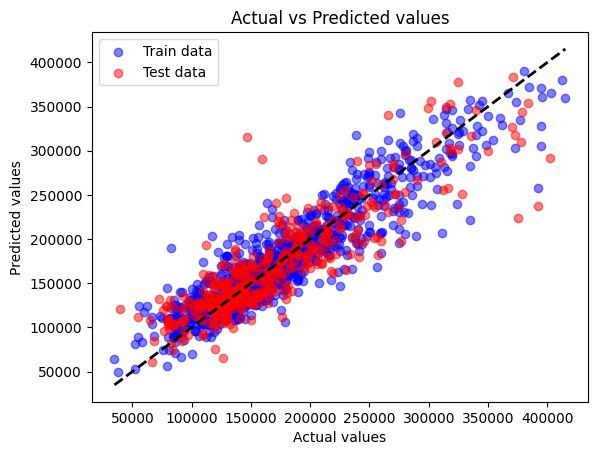

In [28]:
# График для тренировочных данных
# print(type(prediction_test))
# prediction_test = np.clip(prediction_test, np.min(prediction_train), np.max(prediction_train))

plt.scatter(target_train, prediction_train, color='blue', label='Train data', alpha=0.5)
# График для тестовых данных
plt.scatter(target_test, prediction_test, color='red', label='Test data', alpha=0.5)

# Линия идеальных предсказаний
plt.plot([min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         [min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         'k--', lw=2)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

### 7. Проверка предсказаний

1. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE.
2. Постройте диаграмму рассеяния целевой и предсказанной переменных. 

In [29]:
# Ваш код здесь

mse_train = mean_squared_error(target_train, prediction_train)
mse_test = mean_squared_error(target_test, prediction_test)

mae_train = mean_absolute_error(target_train, prediction_train)
mae_test = mean_absolute_error(target_test, prediction_test)

print("MSE:")
print(f'MSE (train): {mse_train}')
print(f'MSE (test): {mse_test}')

print("\nMAE:")
print(f'MAE (train): {mae_train}')
print(f'MAE (test): {mae_test}')


MSE:
MSE (train): 661467484.9527197
MSE (test): 936450933.5692276

MAE:
MAE (train): 19260.242886384087
MAE (test): 21728.273005693765


### выводы

In [30]:
# Получение признаков и их коэффициентов
features = fitches_train.columns
coefficients = liner_reg.coef_

# Создание DataFrame для удобного вывода
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
pd.set_option('display.float_format', lambda x: '%.5f' % x)
feature_importance

,Feature,Coefficient
0,division_GrLivAreaplus_OverallQual,22241.00373
1,SaleCondition_Normal,19255.26418
2,SaleCondition_Partial,37152.00595
3,SaleCondition_other,14655.22614
4,Street_Pave,6948.31740
...,...,...
209,scl_OverallQual^4 GrLivArea_plus_GarageArea^2,-25757104.48455
210,scl_OverallQual^3 GrLivArea_plus_GarageArea^3,-5129469.09286
211,scl_OverallQual^2 GrLivArea_plus_GarageArea^4,24505290.83171
212,scl_OverallQual GrLivArea_plus_GarageArea^5,-19825115.00103


In [31]:
from sklearn.feature_selection import SelectKBest, f_regression

# Выборка 10 лучших признаков
selector = SelectKBest(score_func=f_regression, k=33)
X_train_selected = selector.fit_transform(fitches_train, target_train)
X_test_selected = selector.transform(fitches_test)



# Обучение модели на выбранных признаках
liner_reg.fit(X_train_selected, target_train)

# Предсказание на тренировочных и тестовых данных
y_train_pred = liner_reg.predict(X_train_selected)
y_test_pred = liner_reg.predict(X_test_selected)

# Вычисление метрик
mse_train = mean_squared_error(target_train, y_train_pred)
mse_test = mean_squared_error(target_test, y_test_pred)
mae_train = mean_absolute_error(target_train, y_train_pred)
mae_test = mean_absolute_error(target_test, y_test_pred)

print("MSE на тренировочных данных:", mse_train)
print("MSE на тестовых данных:", mse_test)
print("MAE на тренировочных данных:", mae_train)
print("MAE на тестовых данных:", mae_test)

MSE на тренировочных данных: 791499336.8939761
MSE на тестовых данных: 908995563.6024778
MAE на тренировочных данных: 20804.305158631232
MAE на тестовых данных: 21405.186456652376


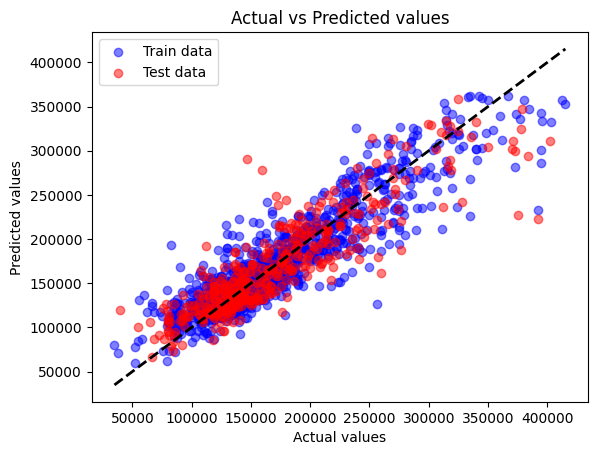

In [32]:
plt.scatter(target_train, y_train_pred, color='blue', label='Train data', alpha=0.5)
# График для тестовых данных
plt.scatter(target_test, y_test_pred, color='red', label='Test data', alpha=0.5)

# Линия идеальных предсказаний
plt.plot([min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         [min(target_train.min(), target_test.min()), max(target_train.max(), target_test.max())], 
         'k--', lw=2)

plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()